In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum()

Loan_ID               0
Gender                2
Married               1
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

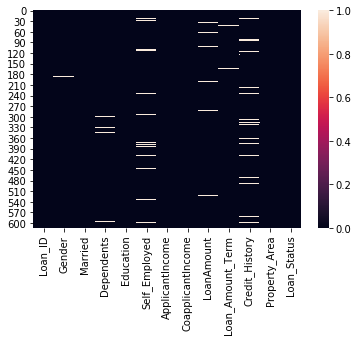

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['Gender'] = df['Gender'].fillna(0)
df['Married'] = df['Married'].fillna(0)
df['Dependents'] = df['Dependents'].fillna(0)
df['Self_Employed'] = df['Self_Employed'].fillna(0)
df['LoanAmount'] = df['LoanAmount'].fillna(0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(0)
df['Credit_History'] = df['Credit_History'].fillna(0)

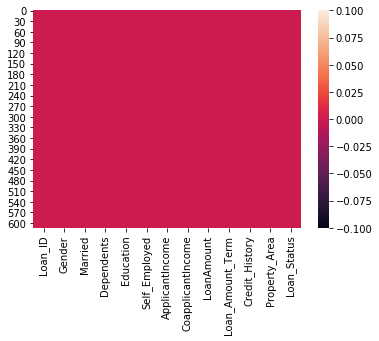

In [10]:
sns.heatmap(df.isnull())

In [11]:
 df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
dfcor=df.corr()
dfcor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.006986
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.058795
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.032711
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.050145
Credit_History,0.006986,-0.058795,-0.032711,0.050145,1.000000


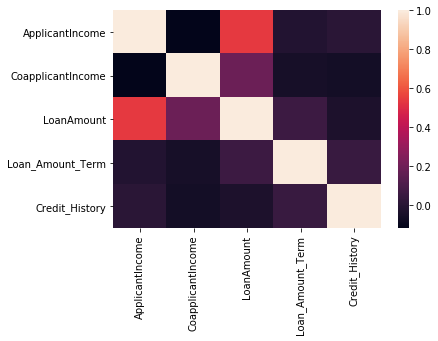

In [15]:
sns.heatmap(dfcor)

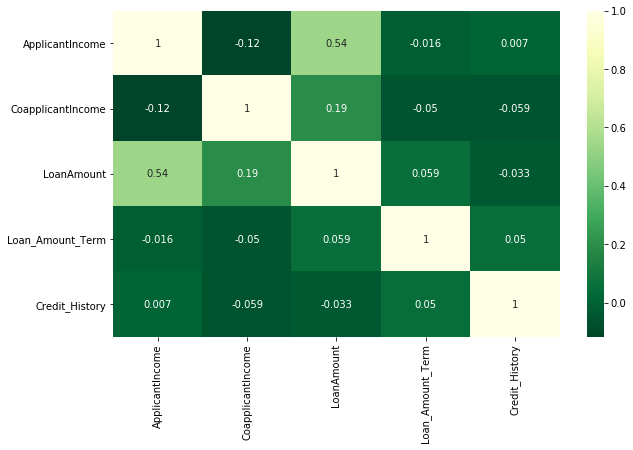

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlGn_r',annot=True)

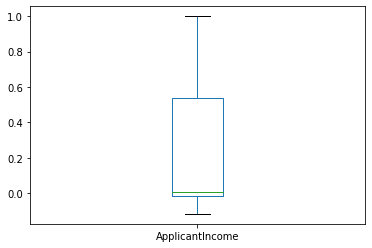

In [17]:
dfcor['ApplicantIncome'].plot.box()

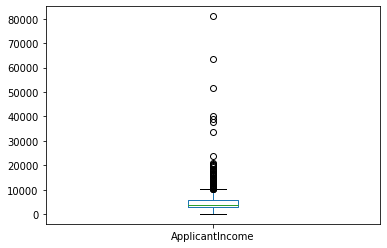

In [18]:
df['ApplicantIncome'].plot.box()

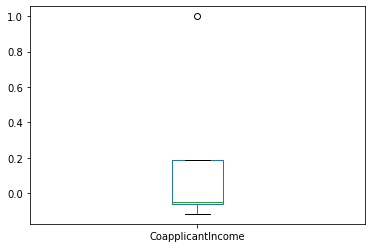

In [19]:
dfcor['CoapplicantIncome'].plot.box()

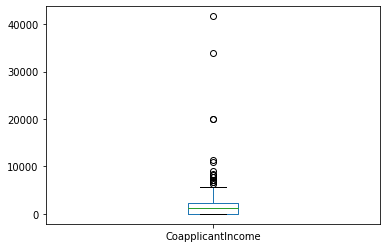

In [20]:
df['CoapplicantIncome'].plot.box()

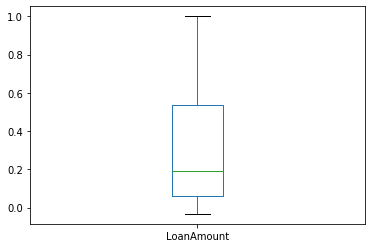

In [21]:
dfcor['LoanAmount'].plot.box()

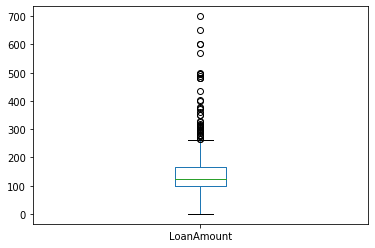

In [22]:
df['LoanAmount'].plot.box()

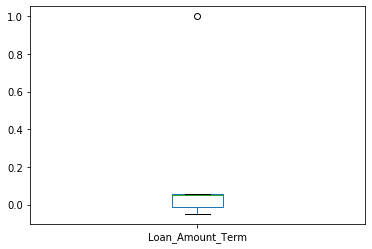

In [23]:
dfcor['Loan_Amount_Term'].plot.box()

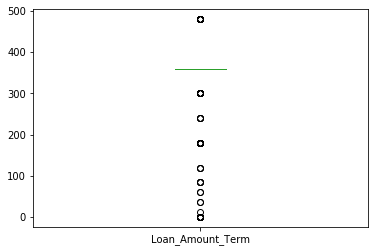

In [24]:
df['Loan_Amount_Term'].plot.box()

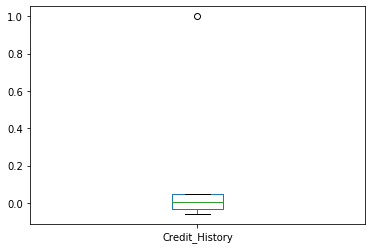

In [25]:
dfcor['Credit_History'].plot.box()

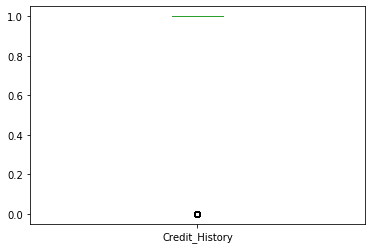

In [26]:
df['Credit_History'].plot.box()

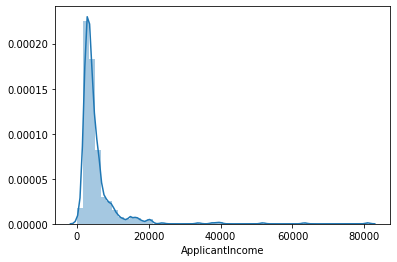

In [27]:
sns.distplot(df['ApplicantIncome'])

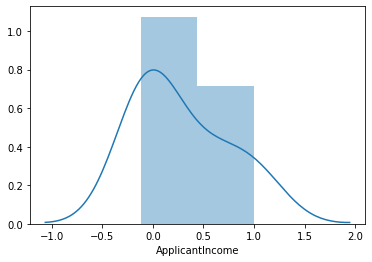

In [28]:
sns.distplot(dfcor['ApplicantIncome'])

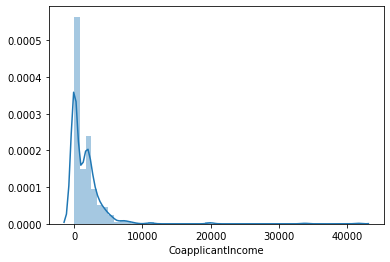

In [29]:
sns.distplot(df['CoapplicantIncome'])

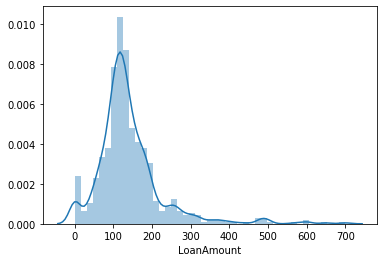

In [30]:
sns.distplot(df['LoanAmount'])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

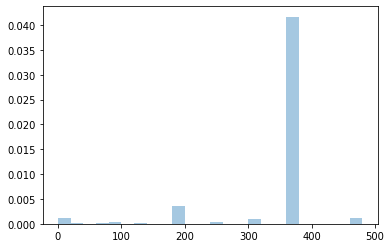

In [31]:
sns.distplot(df['Loan_Amount_Term'])

In [ ]:
sns.distplot(df['Credit_History'])

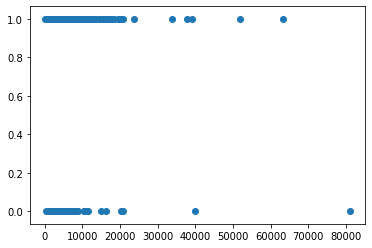

In [32]:
plt.scatter(df['ApplicantIncome'],df['Credit_History'])

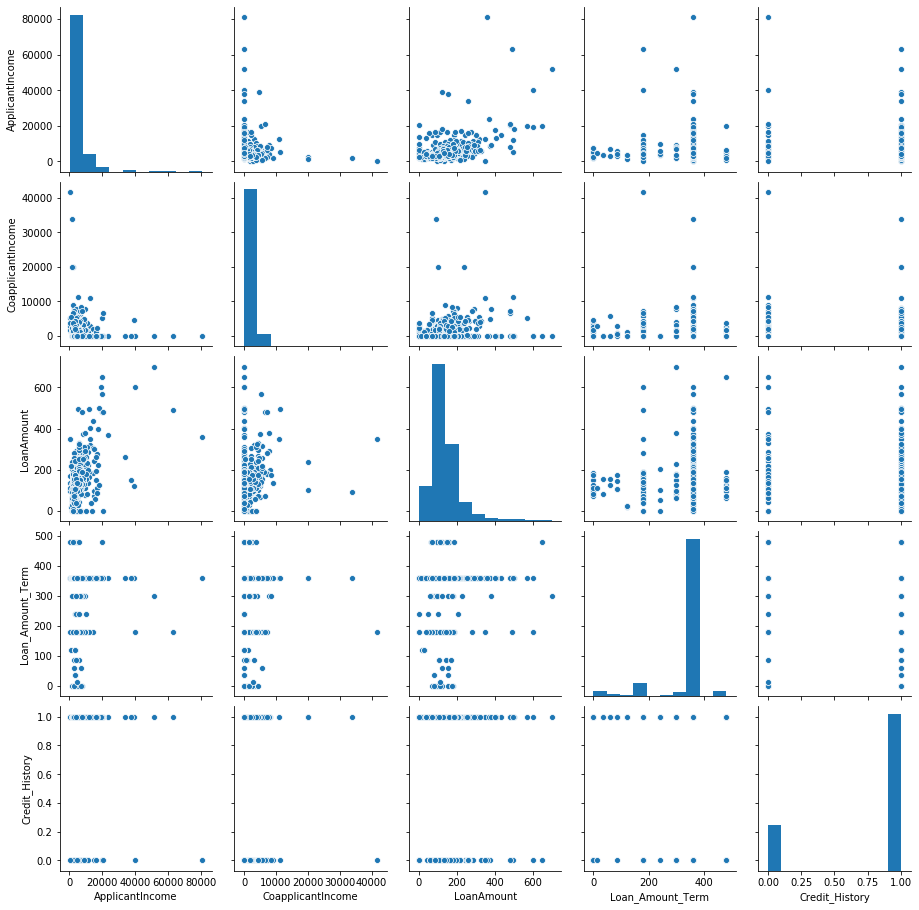

In [33]:
sns.pairplot(df)

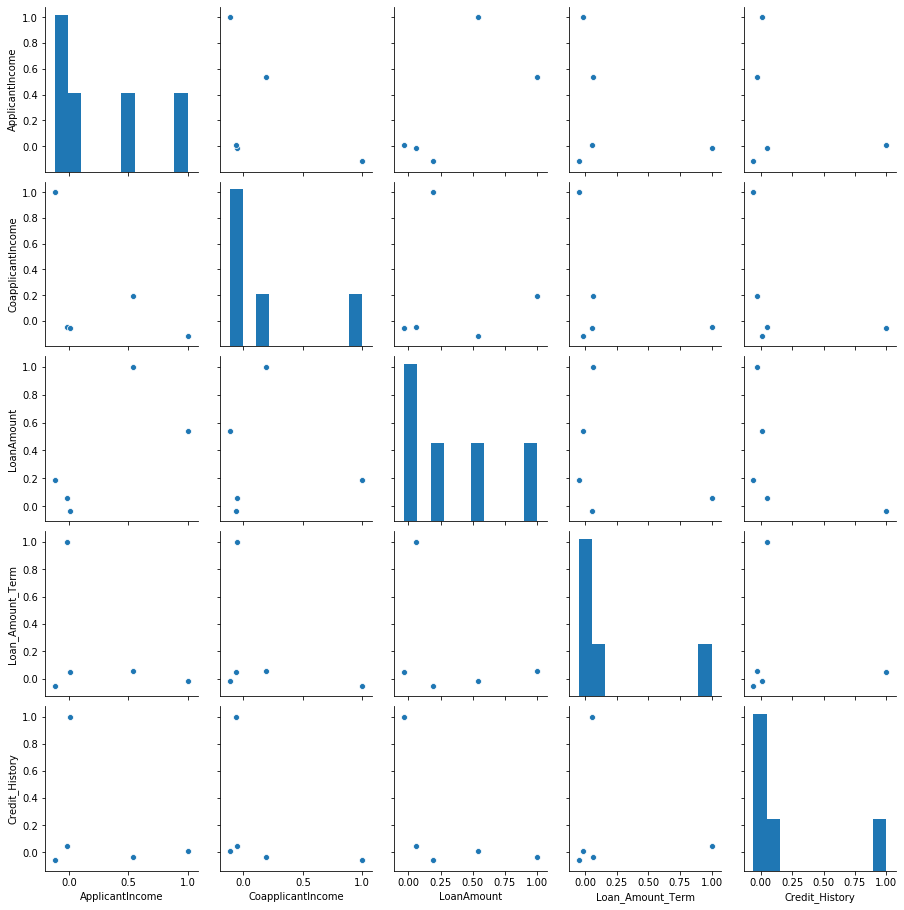

In [34]:
sns.pairplot(dfcor)

In [35]:
x=df.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [36]:
y=df.iloc[:,-1]
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [37]:
# adding dummies to the dataset
x = pd.get_dummies(x)
y = pd.get_dummies(y)
#df= pd.get_dummies(df)
# limchiahooi/loan-approval-prediction from github only this part for refrence

In [38]:
y

,N,Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,1
610,0,1
611,0,1
612,0,1


In [39]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0.0,360.0,1.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.39,random_state=52)

In [41]:
x_train.shape

(374, 638)

In [42]:
y_train.shape

(374, 2)

In [43]:
x_test.shape

(240, 638)

In [44]:
y_test.shape

(240, 2)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2 score corresponding to random state: ', r_state,'is: ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

r2 score corresponding to random state:  42 is:  0.1742620862825412
r2 score corresponding to random state:  43 is:  0.14108038800921363
r2 score corresponding to random state:  44 is:  0.19377711653059
r2 score corresponding to random state:  45 is:  0.1882533147975463
r2 score corresponding to random state:  46 is:  0.2496515690207145
r2 score corresponding to random state:  47 is:  0.17943827023322811
r2 score corresponding to random state:  48 is:  -0.01163172062750395
r2 score corresponding to random state:  49 is:  0.17365556016015682
r2 score corresponding to random state:  50 is:  0.12164987219363171
r2 score corresponding to random state:  51 is:  0.14608726561200613
r2 score corresponding to random state:  52 is:  0.21205800737015745
r2 score corresponding to random state:  53 is:  0.06906143790123209
r2 score corresponding to random state:  54 is:  0.26444350261818117
r2 score corresponding to random state:  55 is:  0.04171842683664623
r2 score corresponding to random state:

In [46]:
lg=LogisticRegression()

In [47]:
lg.fit(x_train,y_train)

ValueError: bad input shape (491, 2)

In [48]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(t_test_predmnb))
print(clssification_report(y_test,predmnb))

ValueError: bad input shape (491, 2)

In [49]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

ValueError: bad input shape (491, 2)

In [50]:
#DescisionTreeClassifier(criterion=gini)
#DecisionTreeClassifier(criterion='entropy')
#Gini and entropy
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6178861788617886


ValueError: multilabel-indicator is not supported

In [51]:
#k=10
dtc=KNeighborsClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classifiction_report(y_test,preddtc))

0.6097560975609756


ValueError: multilabel-indicator is not supported

In [52]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.sore(x_train,y_train)
predsvc=svc.predicst(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(lassifiation_report(y_test,predsvc))

ValueError: bad input shape (491, 2)